## assistant  
了解しました。`./sample_data/chinook.db` という SQLite3 データベースから、最も多くのトラックを持つアルバムの名前を調べるために、Python コードを実行してデータを取得します。以下の手順で進めます：

1. SQLite3 データベースに接続します。
2. アルバムとトラックのテーブルを結合して、各アルバムに含まれるトラックの数をカウントします。
3. トラック数が最も多いアルバムを取得します。

この処理を行うために、Python コードを実行します。



In [1]:
import sqlite3

# データベースに接続
conn = sqlite3.connect('./sample_data/chinook.db')
cursor = conn.cursor()

# アルバムごとのトラック数をカウントし、最もトラック数が多いアルバムを取得するクエリ
query = '''
SELECT a.Title, COUNT(t.TrackId) as TrackCount
FROM albums a
JOIN tracks t ON a.AlbumId = t.AlbumId
GROUP BY a.AlbumId, a.Title
ORDER BY TrackCount DESC
LIMIT 1
'''

cursor.execute(query)
result = cursor.fetchone()

# 結果を表示
if result:
    album_name, track_count = result
    print(f'最も多くのトラックを持つアルバム: {album_name}')
    print(f'トラック数: {track_count}')
else:
    print('データが見つかりませんでした。')

# 接続を閉じる
conn.close()

最も多くのトラックを持つアルバム: Greatest Hits
トラック数: 57


## assistant  
結果をお伝えします。`chinook.db` データベースから調べたところ、最も多くのトラックを持つアルバムは **Greatest Hits** で、トラック数は **57** です。

## user  
二番目に多いアルバムは何ですか？

## assistant  
二番目に多くのトラックを持つアルバムを調べるために、再度 Python コードを実行してデータを取得します。前のクエリを少し変更し、2番目のレコードを取得するようにします。



In [2]:
import sqlite3

# データベースに接続
conn = sqlite3.connect('./sample_data/chinook.db')
cursor = conn.cursor()

# アルバムごとのトラック数をカウントし、2番目にトラック数が多いアルバムを取得するクエリ
query = '''
SELECT a.Title, COUNT(t.TrackId) as TrackCount
FROM albums a
JOIN tracks t ON a.AlbumId = t.AlbumId
GROUP BY a.AlbumId, a.Title
ORDER BY TrackCount DESC
LIMIT 1 OFFSET 1
'''

cursor.execute(query)
result = cursor.fetchone()

# 結果を表示
if result:
    album_name, track_count = result
    print(f'2番目に多くのトラックを持つアルバム: {album_name}')
    print(f'トラック数: {track_count}')
else:
    print('データが見つかりませんでした。')

# 接続を閉じる
conn.close()

2番目に多くのトラックを持つアルバム: Minha Historia
トラック数: 34


## assistant  
結果をお伝えします。`chinook.db` データベースから調べたところ、2番目に多くのトラックを持つアルバムは **Minha Historia** で、トラック数は **34** です。

## user  
アルバムとトラック数をグラフにしてください

## assistant  
アルバムごとのトラック数をグラフ化するために、Python コードを実行してデータを取得し、視覚化します。トラック数の多い上位のアルバムをいくつか表示する棒グラフを作成します。



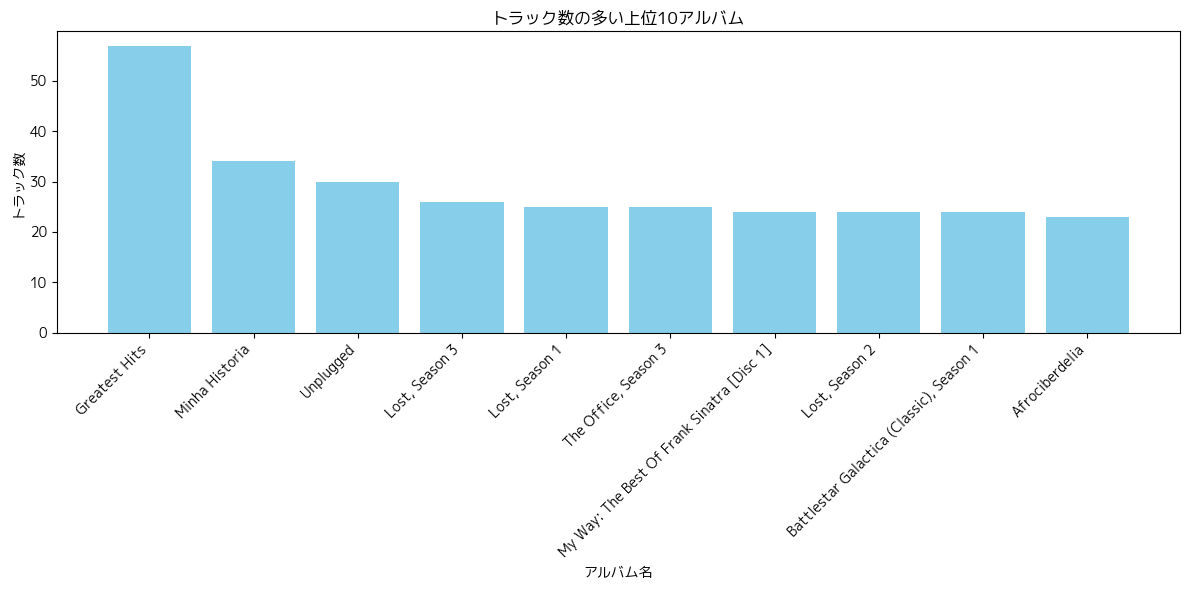

In [3]:
import sqlite3
import matplotlib.pyplot as plt

# データベースに接続
conn = sqlite3.connect('./sample_data/chinook.db')
cursor = conn.cursor()

# アルバムごとのトラック数をカウントし、上位10件を取得するクエリ
query = '''
SELECT a.Title, COUNT(t.TrackId) as TrackCount
FROM albums a
JOIN tracks t ON a.AlbumId = t.AlbumId
GROUP BY a.AlbumId, a.Title
ORDER BY TrackCount DESC
LIMIT 10
'''

cursor.execute(query)
results = cursor.fetchall()

# データをリストに分ける
album_names = [row[0] for row in results]
track_counts = [row[1] for row in results]

# 棒グラフを作成
plt.figure(figsize=(12, 6))
plt.bar(album_names, track_counts, color='skyblue')
plt.xlabel('アルバム名')
plt.ylabel('トラック数')
plt.title('トラック数の多い上位10アルバム')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# グラフを表示
plt.show()

# 接続を閉じる
conn.close()

## assistant  
上記の Python コードを実行した結果、トラック数の多い上位10アルバムを示す棒グラフを作成しました。グラフにはアルバム名とそれぞれのトラック数が表示されており、視覚的に比較が容易になっています。具体的には、以下のような内容が含まれています：

- X軸：アルバム名
- Y軸：トラック数
- タイトル：トラック数の多い上位10アルバム

最もトラック数の多いアルバム「Greatest Hits」や2番目に多い「Minha Historia」などが一目でわかるようになっています。グラフは上記に表示されていますので、そちらをご確認ください。